In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 320
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_squared_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0001_0100"
MODEL_NAME = "0001_0100-64-convsim-xc4"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0174
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.8130

from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import ConvSimG as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 32, 32, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 16)   8208        activation_4[0][0]               
______________________________________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
        dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
        dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/
Noisy files:8086
Nitid files:8086
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/validation/
Noisy files:2000
Nitid files:2000


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/320
253/253 [==============================] - 8s 17ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 2/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 3/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 4/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 5/320
253/253 [==============================] - 4s 17ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 6/320
253/253 [==============================] - 4s 17ms/step - loss: 0.0024 - val_loss: 0.0038
Epoch 7/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0024 - val_loss: 0.0037
Epoch 8/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0024 - val_loss: 0.0038
Epoch 9/320
253/253 [===

253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 80/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 81/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 82/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 83/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 84/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 85/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 86/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 87/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 88/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - 

253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 159/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 160/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 161/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0035
Epoch 162/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0036
Epoch 163/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0035
Epoch 164/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 165/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 166/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 167/320
253/253 [==============================] - 4s 16ms/step - loss: 

Epoch 237/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 238/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 239/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0035
Epoch 240/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 241/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0035
Epoch 242/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 243/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 244/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 245/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 246/320
253/253 [==============================] - 4s 16ms

Epoch 316/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 317/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 318/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 319/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 320/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0018 - val_loss: 0.0034
Train size:8086
Valid.size:2000
--- 1285.3466246128082 seconds ---


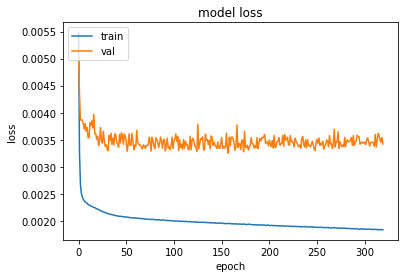

In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Images count =2000
Best RMSENZ  =1950 (0.97)
Best MAENZ   =1906 (0.95)
Best PSNR    =1950 (0.97)
Best Accuracy=1639 (0.82)
RMSE-NZ  Pred=0.0509  Noisy=0.1151
MAE-NZ   Pred=0.0428  Noisy=0.0945
PSNR     Pred=11.6 dB Noisy=5.1 dB
Accuracy Pred=0.26    Noisy=0.12
SSM      Pred=0.84    Noisy=0.30
HOG MSE  Pred=0.11    Noisy=0.15


In [10]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test/
Noisy files:15
Nitid files:15
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_06_00_0_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_06_00_0_nitid_idx076.tif


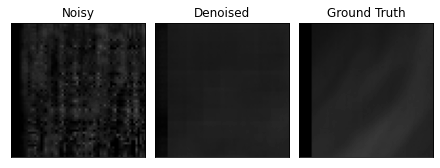

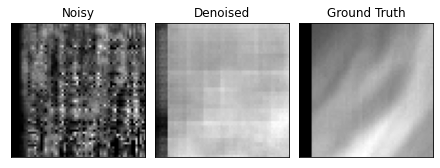

RMSE-NZ  Pred=0.0383  Noisy=0.0762 BEST
MAE-NZ   Pred=0.0315  Noisy=0.0607 BEST
PSNR     Pred=15.3 dB Noisy=9.3 dB BEST
Accuracy Pred=0.18    Noisy=0.11 BEST
SSM      Pred=0.88    Noisy=0.41
HOG MSE  Pred=0.12    Noisy=0.15
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_00_9_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_00_9_nitid_idx076.tif


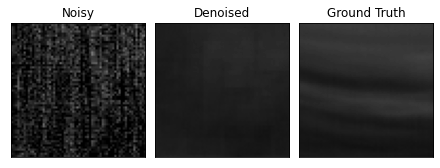

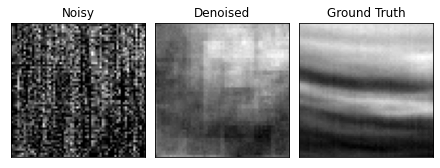

RMSE-NZ  Pred=0.0522  Noisy=0.1043 BEST
MAE-NZ   Pred=0.0430  Noisy=0.0869 BEST
PSNR     Pred=13.7 dB Noisy=7.7 dB BEST
Accuracy Pred=0.16    Noisy=0.06 BEST
SSM      Pred=0.89    Noisy=0.13
HOG MSE  Pred=0.33    Noisy=0.22
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_11_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_11_nitid_idx076.tif


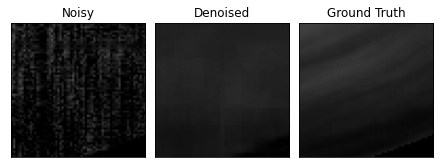

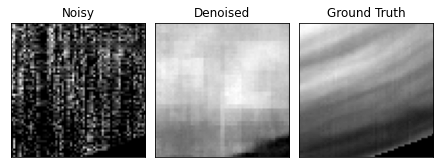

RMSE-NZ  Pred=0.0408  Noisy=0.0960 BEST
MAE-NZ   Pred=0.0333  Noisy=0.0800 BEST
PSNR     Pred=15.8 dB Noisy=8.4 dB BEST
Accuracy Pred=0.20    Noisy=0.06 BEST
SSM      Pred=0.85    Noisy=0.20
HOG MSE  Pred=0.12    Noisy=0.21
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_2_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_2_nitid_idx076.tif


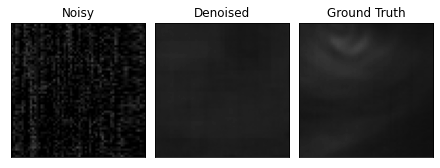

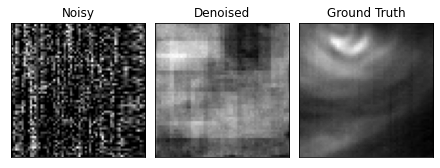

RMSE-NZ  Pred=0.0344  Noisy=0.0938 BEST
MAE-NZ   Pred=0.0283  Noisy=0.0805 BEST
PSNR     Pred=17.9 dB Noisy=9.1 dB BEST
Accuracy Pred=0.17    Noisy=0.06 BEST
SSM      Pred=0.89    Noisy=0.18
HOG MSE  Pred=0.13    Noisy=0.11
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_00_15_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_00_15_nitid_idx076.tif


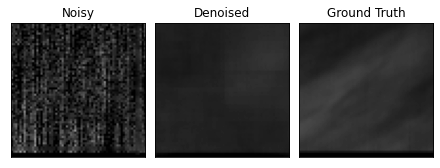

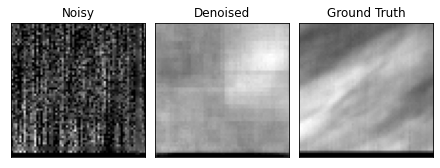

RMSE-NZ  Pred=0.0589  Noisy=0.1126 BEST
MAE-NZ   Pred=0.0466  Noisy=0.0917 BEST
PSNR     Pred=13.8 dB Noisy=8.1 dB BEST
Accuracy Pred=0.17    Noisy=0.07 BEST
SSM      Pred=0.83    Noisy=0.13
HOG MSE  Pred=0.06    Noisy=0.27
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_01_7_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_01_7_nitid_idx076.tif


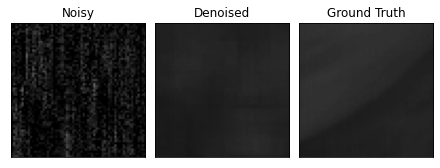

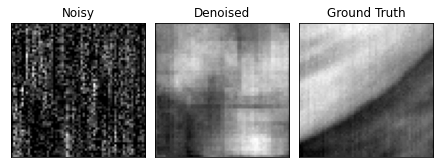

RMSE-NZ  Pred=0.0405  Noisy=0.1147 BEST
MAE-NZ   Pred=0.0328  Noisy=0.1006 BEST
PSNR     Pred=14.2 dB Noisy=5.2 dB BEST
Accuracy Pred=0.23    Noisy=0.05 BEST
SSM      Pred=0.88    Noisy=0.16
HOG MSE  Pred=0.09    Noisy=0.19
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0362_04_01_15_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0362_04_01_15_nitid_idx076.tif


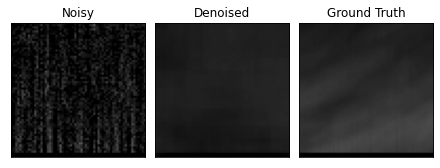

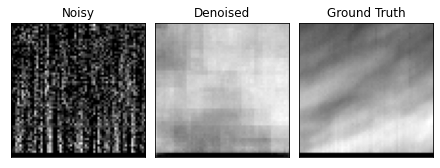

RMSE-NZ  Pred=0.0848  Noisy=0.1357 BEST
MAE-NZ   Pred=0.0648  Noisy=0.1172 BEST
PSNR     Pred=10.7 dB Noisy=6.6 dB BEST
Accuracy Pred=0.18    Noisy=0.04 BEST
SSM      Pred=0.82    Noisy=0.19
HOG MSE  Pred=0.05    Noisy=0.25
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0363_00_00_0_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0363_00_00_0_nitid_idx076.tif


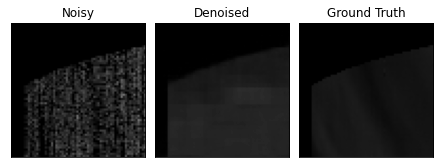

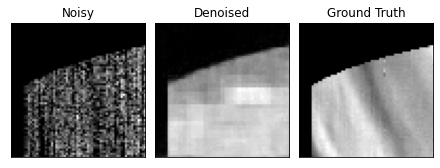

RMSE-NZ  Pred=0.0467  Noisy=0.1015 BEST
MAE-NZ   Pred=0.0368  Noisy=0.0807 BEST
PSNR     Pred=7.9 dB Noisy=1.2 dB BEST
Accuracy Pred=0.29    Noisy=0.10 BEST
SSM      Pred=0.86    Noisy=0.44
HOG MSE  Pred=0.08    Noisy=0.08
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_01_01_8_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_01_01_8_nitid_idx076.tif


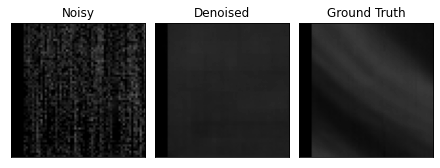

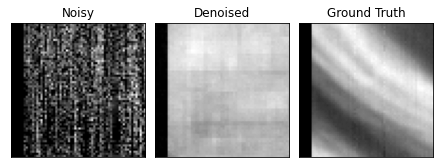

RMSE-NZ  Pred=0.0480  Noisy=0.0960 BEST
MAE-NZ   Pred=0.0413  Noisy=0.0792 BEST
PSNR     Pred=13.6 dB Noisy=7.5 dB BEST
Accuracy Pred=0.13    Noisy=0.07 BEST
SSM      Pred=0.82    Noisy=0.23
HOG MSE  Pred=0.12    Noisy=0.20
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_02_01_9_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_02_01_9_nitid_idx076.tif


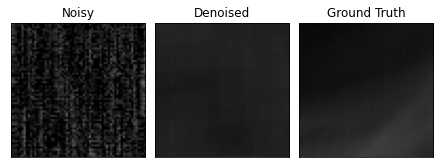

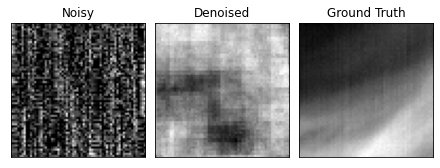

RMSE-NZ  Pred=0.0577  Noisy=0.0971 BEST
MAE-NZ   Pred=0.0494  Noisy=0.0798 BEST
PSNR     Pred=12.5 dB Noisy=8.0 dB BEST
Accuracy Pred=0.09    Noisy=0.07 BEST
SSM      Pred=0.82    Noisy=0.14
HOG MSE  Pred=0.14    Noisy=0.15
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_03_00_9_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_03_00_9_nitid_idx076.tif


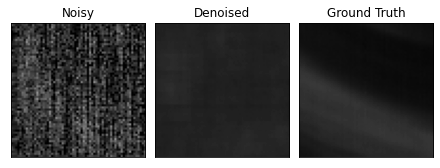

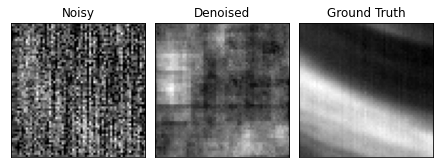

RMSE-NZ  Pred=0.0626  Noisy=0.1540 BEST
MAE-NZ   Pred=0.0567  Noisy=0.1226 BEST
PSNR     Pred=11.1 dB Noisy=3.3 dB BEST
Accuracy Pred=0.05    Noisy=0.05 WORST
SSM      Pred=0.75    Noisy=0.08
HOG MSE  Pred=0.18    Noisy=0.19
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0569_02_01_11_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0569_02_01_11_nitid_idx076.tif


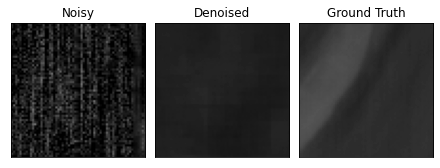

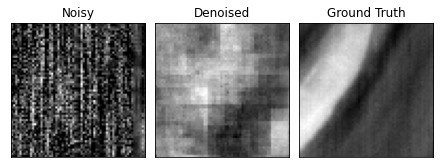

RMSE-NZ  Pred=0.0983  Noisy=0.1426 BEST
MAE-NZ   Pred=0.0844  Noisy=0.1207 BEST
PSNR     Pred=10.6 dB Noisy=7.4 dB BEST
Accuracy Pred=0.01    Noisy=0.04 WORST
SSM      Pred=0.71    Noisy=0.13
HOG MSE  Pred=0.13    Noisy=0.19
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_02_01_10_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_02_01_10_nitid_idx076.tif


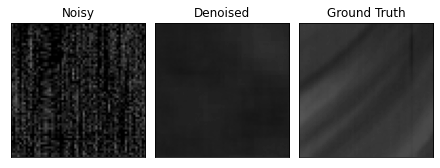

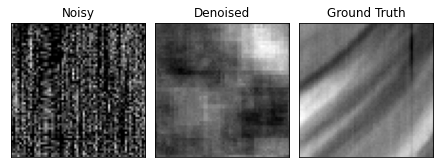

RMSE-NZ  Pred=0.0974  Noisy=0.1416 BEST
MAE-NZ   Pred=0.0869  Noisy=0.1219 BEST
PSNR     Pred=10.8 dB Noisy=7.5 dB BEST
Accuracy Pred=0.04    Noisy=0.04 BEST
SSM      Pred=0.69    Noisy=0.12
HOG MSE  Pred=0.12    Noisy=0.27
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_03_00_11_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_03_00_11_nitid_idx076.tif


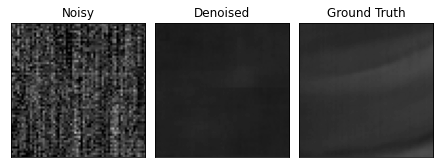

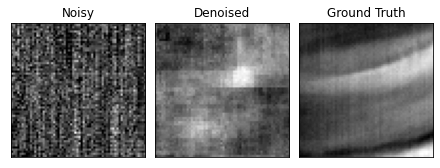

RMSE-NZ  Pred=0.0753  Noisy=0.1312 BEST
MAE-NZ   Pred=0.0699  Noisy=0.1051 BEST
PSNR     Pred=12.0 dB Noisy=7.2 dB BEST
Accuracy Pred=0.00    Noisy=0.05 WORST
SSM      Pred=0.83    Noisy=0.07
HOG MSE  Pred=0.11    Noisy=0.18
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0706_02_01_3_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0706_02_01_3_nitid_idx076.tif


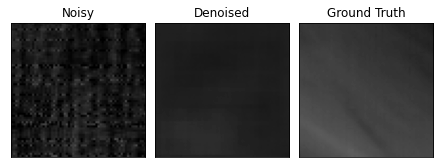

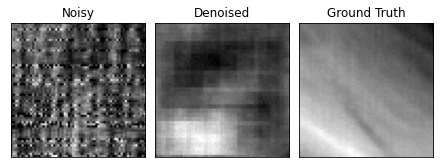

RMSE-NZ  Pred=0.1239  Noisy=0.1634 BEST
MAE-NZ   Pred=0.1178  Noisy=0.1488 BEST
PSNR     Pred=9.4 dB Noisy=7.0 dB BEST
Accuracy Pred=0.00    Noisy=0.01 WORST
SSM      Pred=0.74    Noisy=0.35
HOG MSE  Pred=0.09    Noisy=0.12
******************************************************


In [11]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )